In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Train DataFrame

In [2]:
df = pd.read_csv(r'train.csv') 
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

<Axes: >

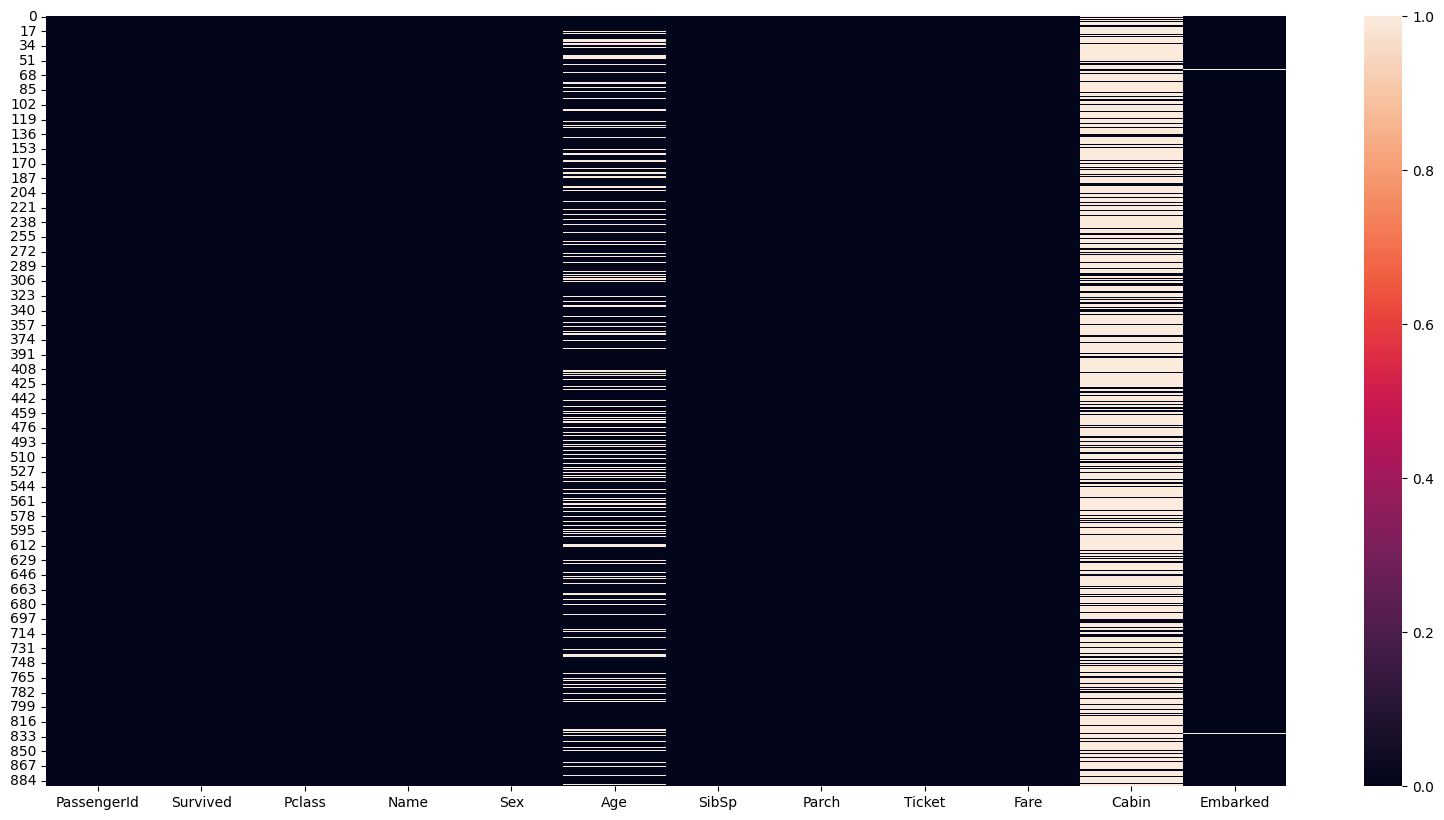

In [5]:
plt.figure(figsize=(20,10))
sb.heatmap(df.isnull())

In [6]:
null_percnt = [var for var in df.columns if df[var].isnull().sum()>0]
null_percnt

['Age', 'Cabin', 'Embarked']

In [7]:
twnt_percnt = [var for var in df.columns if df[var].isnull().mean() *100 >20]
twnt_percnt

['Cabin']

In [8]:
df.shape

(891, 12)

In [9]:
df.drop(columns='Cabin',axis=1,inplace=True)
df.shape

(891, 11)

In [10]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('_'*60)
    print('\n')

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [11]:
df.drop(columns=['Ticket','Name','PassengerId'],axis=1,inplace=True)
df.shape

(891, 8)

In [12]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
df[df['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [15]:
df[(df['Survived']==1) & (df['Pclass']==1) & (df['Sex']=='female')].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
11,1,1,female,58.0,0,0,26.5500,S
31,1,1,female,NaN,1,0,146.5208,C
52,1,1,female,49.0,1,0,76.7292,C
61,1,1,female,38.0,0,0,80.0000,NaN
88,1,1,female,23.0,3,2,263.0000,S
136,1,1,female,19.0,0,2,26.2833,S
151,1,1,female,22.0,1,0,66.6000,S
166,1,1,female,NaN,0,1,55.0000,S


In [16]:
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].isnull().sum()

0

In [17]:
df[df['Age'].notnull()].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


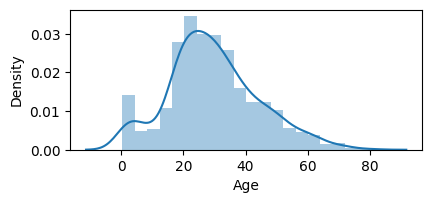

In [18]:
null_list = ['Age']
plt.figure(figsize=(10,4))
for i,var in enumerate(null_list):
    plt.subplot(2,2,i+1)
    sb.distplot(df[var])

In [19]:
df_mean=df.copy()

numeric_null_list=['Age']
categorical_list=['Fare']
for num,cat in zip(numeric_null_list,categorical_list):
    for var_cat in df[cat].unique():
        df_mean.update(df[df.loc[:,cat]==var_cat][num].replace(np.nan, df[df.loc[:,cat]==var_cat][num].mean()))

In [20]:
df_mean['Age'].isnull().sum().sum()

43

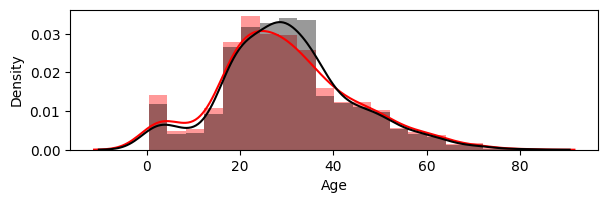

In [21]:
plt.figure(figsize=(15,4))
for i,var in enumerate(numeric_null_list):
    plt.subplot(2,2,i+1)
    sb.distplot(df[var],bins=20,color='r')
    sb.distplot(df_mean[var],bins=20,color='k')

In [22]:
df_mean['Age'] = df_mean['Age'].fillna(df_mean['Age'].median())

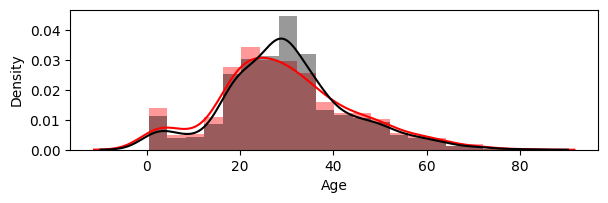

In [23]:
plt.figure(figsize=(15,4))
for i,var in enumerate(numeric_null_list):
    plt.subplot(2,2,i+1)
    sb.distplot(df[var],bins=20,color='r')
    sb.distplot(df_mean[var],bins=20,color='k')

In [24]:
df_mean.isnull().sum().sum()

0

In [25]:
df = df_mean

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [27]:
df['Age'] = df['Age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 52.3+ KB


In [28]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.882155,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.379030,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


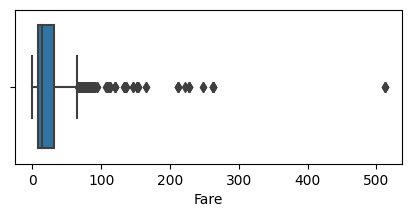

In [29]:
plt.figure(figsize=(5,2))
sb.boxplot(x='Fare',data=df)
plt.show()

In [30]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [31]:
fare = detect_outliers(df['Fare'])
fare

[263.0,
 263.0,
 247.5208,
 512.3292,
 247.5208,
 262.375,
 263.0,
 211.5,
 227.525,
 263.0,
 221.7792,
 227.525,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375]

In [32]:
df.shape

(891, 8)

In [33]:
df = df[df['Fare']<=211.3375]
df.shape

(874, 8)

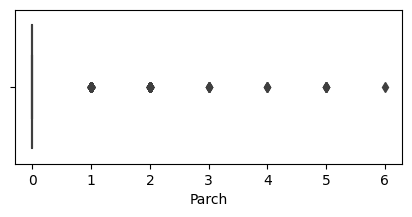

In [34]:
plt.figure(figsize=(5,2))
sb.boxplot(x='Parch',data=df)
plt.show()

In [35]:
parch = detect_outliers(df['Parch'])
parch

[263.0,
 263.0,
 247.5208,
 512.3292,
 247.5208,
 262.375,
 263.0,
 211.5,
 227.525,
 263.0,
 221.7792,
 227.525,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375,
 5,
 5,
 3,
 4,
 4,
 3,
 4,
 5,
 5,
 6,
 3,
 3,
 3,
 5]

In [36]:
df = df[df['Parch']<=3]
df.shape

(865, 8)

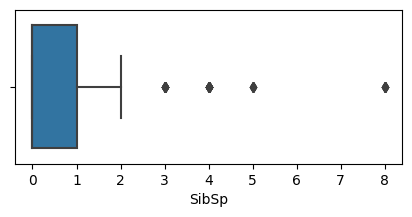

In [37]:
plt.figure(figsize=(5,2))
sb.boxplot(x='SibSp',data=df)
plt.show()

In [38]:
sibsp = detect_outliers(df['SibSp'])
sibsp

[263.0,
 263.0,
 247.5208,
 512.3292,
 247.5208,
 262.375,
 263.0,
 211.5,
 227.525,
 263.0,
 221.7792,
 227.525,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375,
 5,
 5,
 3,
 4,
 4,
 3,
 4,
 5,
 5,
 6,
 3,
 3,
 3,
 5,
 4,
 4,
 5,
 4,
 5,
 4,
 8,
 4,
 4,
 8,
 4,
 8,
 4,
 4,
 4,
 4,
 8,
 5,
 5,
 4,
 4,
 5,
 4,
 4,
 8,
 4,
 4,
 8,
 4,
 8]

In [39]:
df = df[df['SibSp']<=4]
df.shape

(853, 8)

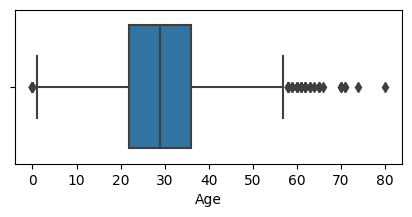

In [40]:
plt.figure(figsize=(5,2))
sb.boxplot(x='Age',data=df)
plt.show()

In [41]:
age = detect_outliers(df['Age'])
age

[263.0,
 263.0,
 247.5208,
 512.3292,
 247.5208,
 262.375,
 263.0,
 211.5,
 227.525,
 263.0,
 221.7792,
 227.525,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375,
 5,
 5,
 3,
 4,
 4,
 3,
 4,
 5,
 5,
 6,
 3,
 3,
 3,
 5,
 4,
 4,
 5,
 4,
 5,
 4,
 8,
 4,
 4,
 8,
 4,
 8,
 4,
 4,
 4,
 4,
 8,
 5,
 5,
 4,
 4,
 5,
 4,
 4,
 8,
 4,
 4,
 8,
 4,
 8,
 71,
 71,
 80,
 74]

In [42]:
df = df[df['Age']<=71]
df.shape

(851, 8)

In [43]:
df['Survived'].value_counts(normalize=True) *100

Survived
0    61.3396
1    38.6604
Name: proportion, dtype: float64

In [44]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# One Hot Encoding

In [45]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('_'*60)
    print('\n')

Survived
[0 1]
____________________________________________________________


Pclass
[3 1 2]
____________________________________________________________


Sex
['male' 'female']
____________________________________________________________


Age
[22 38 26 35 29 54  2 27 14  4 58 20 55 31 34 15 28  8 19 40 66 42 21 18
  3 30 36  7 49 65 43  5 45 37 17 32 25  0 33 16 24 46 59 71 23 47 70 12
  9 51 44  1 61 56 50 62 41 52 63 60 39 10 13 48 11 64 53 57  6]
____________________________________________________________


SibSp
[1 0 3 4 2]
____________________________________________________________


Parch
[0 1 2 3]
____________________________________________________________


Fare
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55     7.8542  16.      29.125   13.
  18.       7.225   26.       8.0292  35.5      7.8792   7.8958  27.7208
 146.5208   7.75    10.5     82.1708  52.       7.2292  11.2417   9.475
  21.      41.5792  15.5     2

In [46]:
from pandas.api.types import CategoricalDtype

In [47]:
df['Pclass'] = df['Pclass'].astype(pd.CategoricalDtype(categories=[1,2,3],ordered=True)).cat.codes

In [48]:
df['Pclass'].unique()

array([2, 0, 1], dtype=int8)

In [49]:
df['SibSp'] = df['SibSp'].astype(pd.CategoricalDtype(categories=[0,1,2,3,4],ordered=True)).cat.codes

In [50]:
df['Parch'] = df['Parch'].astype(pd.CategoricalDtype(categories=[0,1,2,3],ordered=True)).cat.codes

In [51]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,male,22,1,0,7.2500,S
1,1,0,female,38,1,0,71.2833,C


In [52]:
df_object = ['Sex','Embarked']
df = pd.get_dummies(df, columns=df_object, prefix=df_object,drop_first=True)
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,2,22,1,0,7.2500,True,False,True
1,1,0,38,1,0,71.2833,False,False,False


In [53]:
df_boolean = ['Sex_male','Embarked_Q','Embarked_S']

for var in df_boolean:
    df[var] = df[var].astype(int)
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,2,22,1,0,7.2500,1,0,1
1,1,0,38,1,0,71.2833,0,0,0


# Test DataFrame 

In [54]:
test_df = pd.read_csv(r'test.csv') 
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [55]:
test_df.shape

(418, 11)

In [56]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [57]:
test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
test_df.shape

(418, 7)

In [58]:
test_df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [59]:
test_df['Pclass'] = test_df['Pclass'].astype(pd.CategoricalDtype(categories=[1,2,3],ordered=True)).cat.codes

In [60]:
test_df['SibSp'] = test_df['SibSp'].astype(pd.CategoricalDtype(categories=[0,1,2,3,4],ordered=True)).cat.codes

In [61]:
test_df['Parch'] = test_df['Parch'].astype(pd.CategoricalDtype(categories=[0,1,2,3],ordered=True)).cat.codes

In [62]:
test_df_object = ['Sex','Embarked']
test_df = pd.get_dummies(test_df, columns=test_df_object, prefix=test_df_object,drop_first=True)
test_df.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,2,34.5,0,0,7.8292,True,True,False
1,2,47.0,1,0,7.0000,False,False,True


In [63]:
test_df_boolean = ['Sex_male','Embarked_Q','Embarked_S']

for var in test_df_boolean:
    test_df[var] = test_df[var].astype(int)
test_df.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,2,34.5,0,0,7.8292,1,1,0
1,2,47.0,1,0,7.0000,0,0,1


# Train Test Split

In [64]:
X_train = df.drop(columns='Survived',axis=1)
y_train = df['Survived']

X_test  = test_df

print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('y_train : ', y_train.shape)
#print('y_test : ', y_test.shape)

X_train :  (851, 8)
X_test :  (418, 8)
y_train :  (851,)


<Figure size 1000x1000 with 0 Axes>

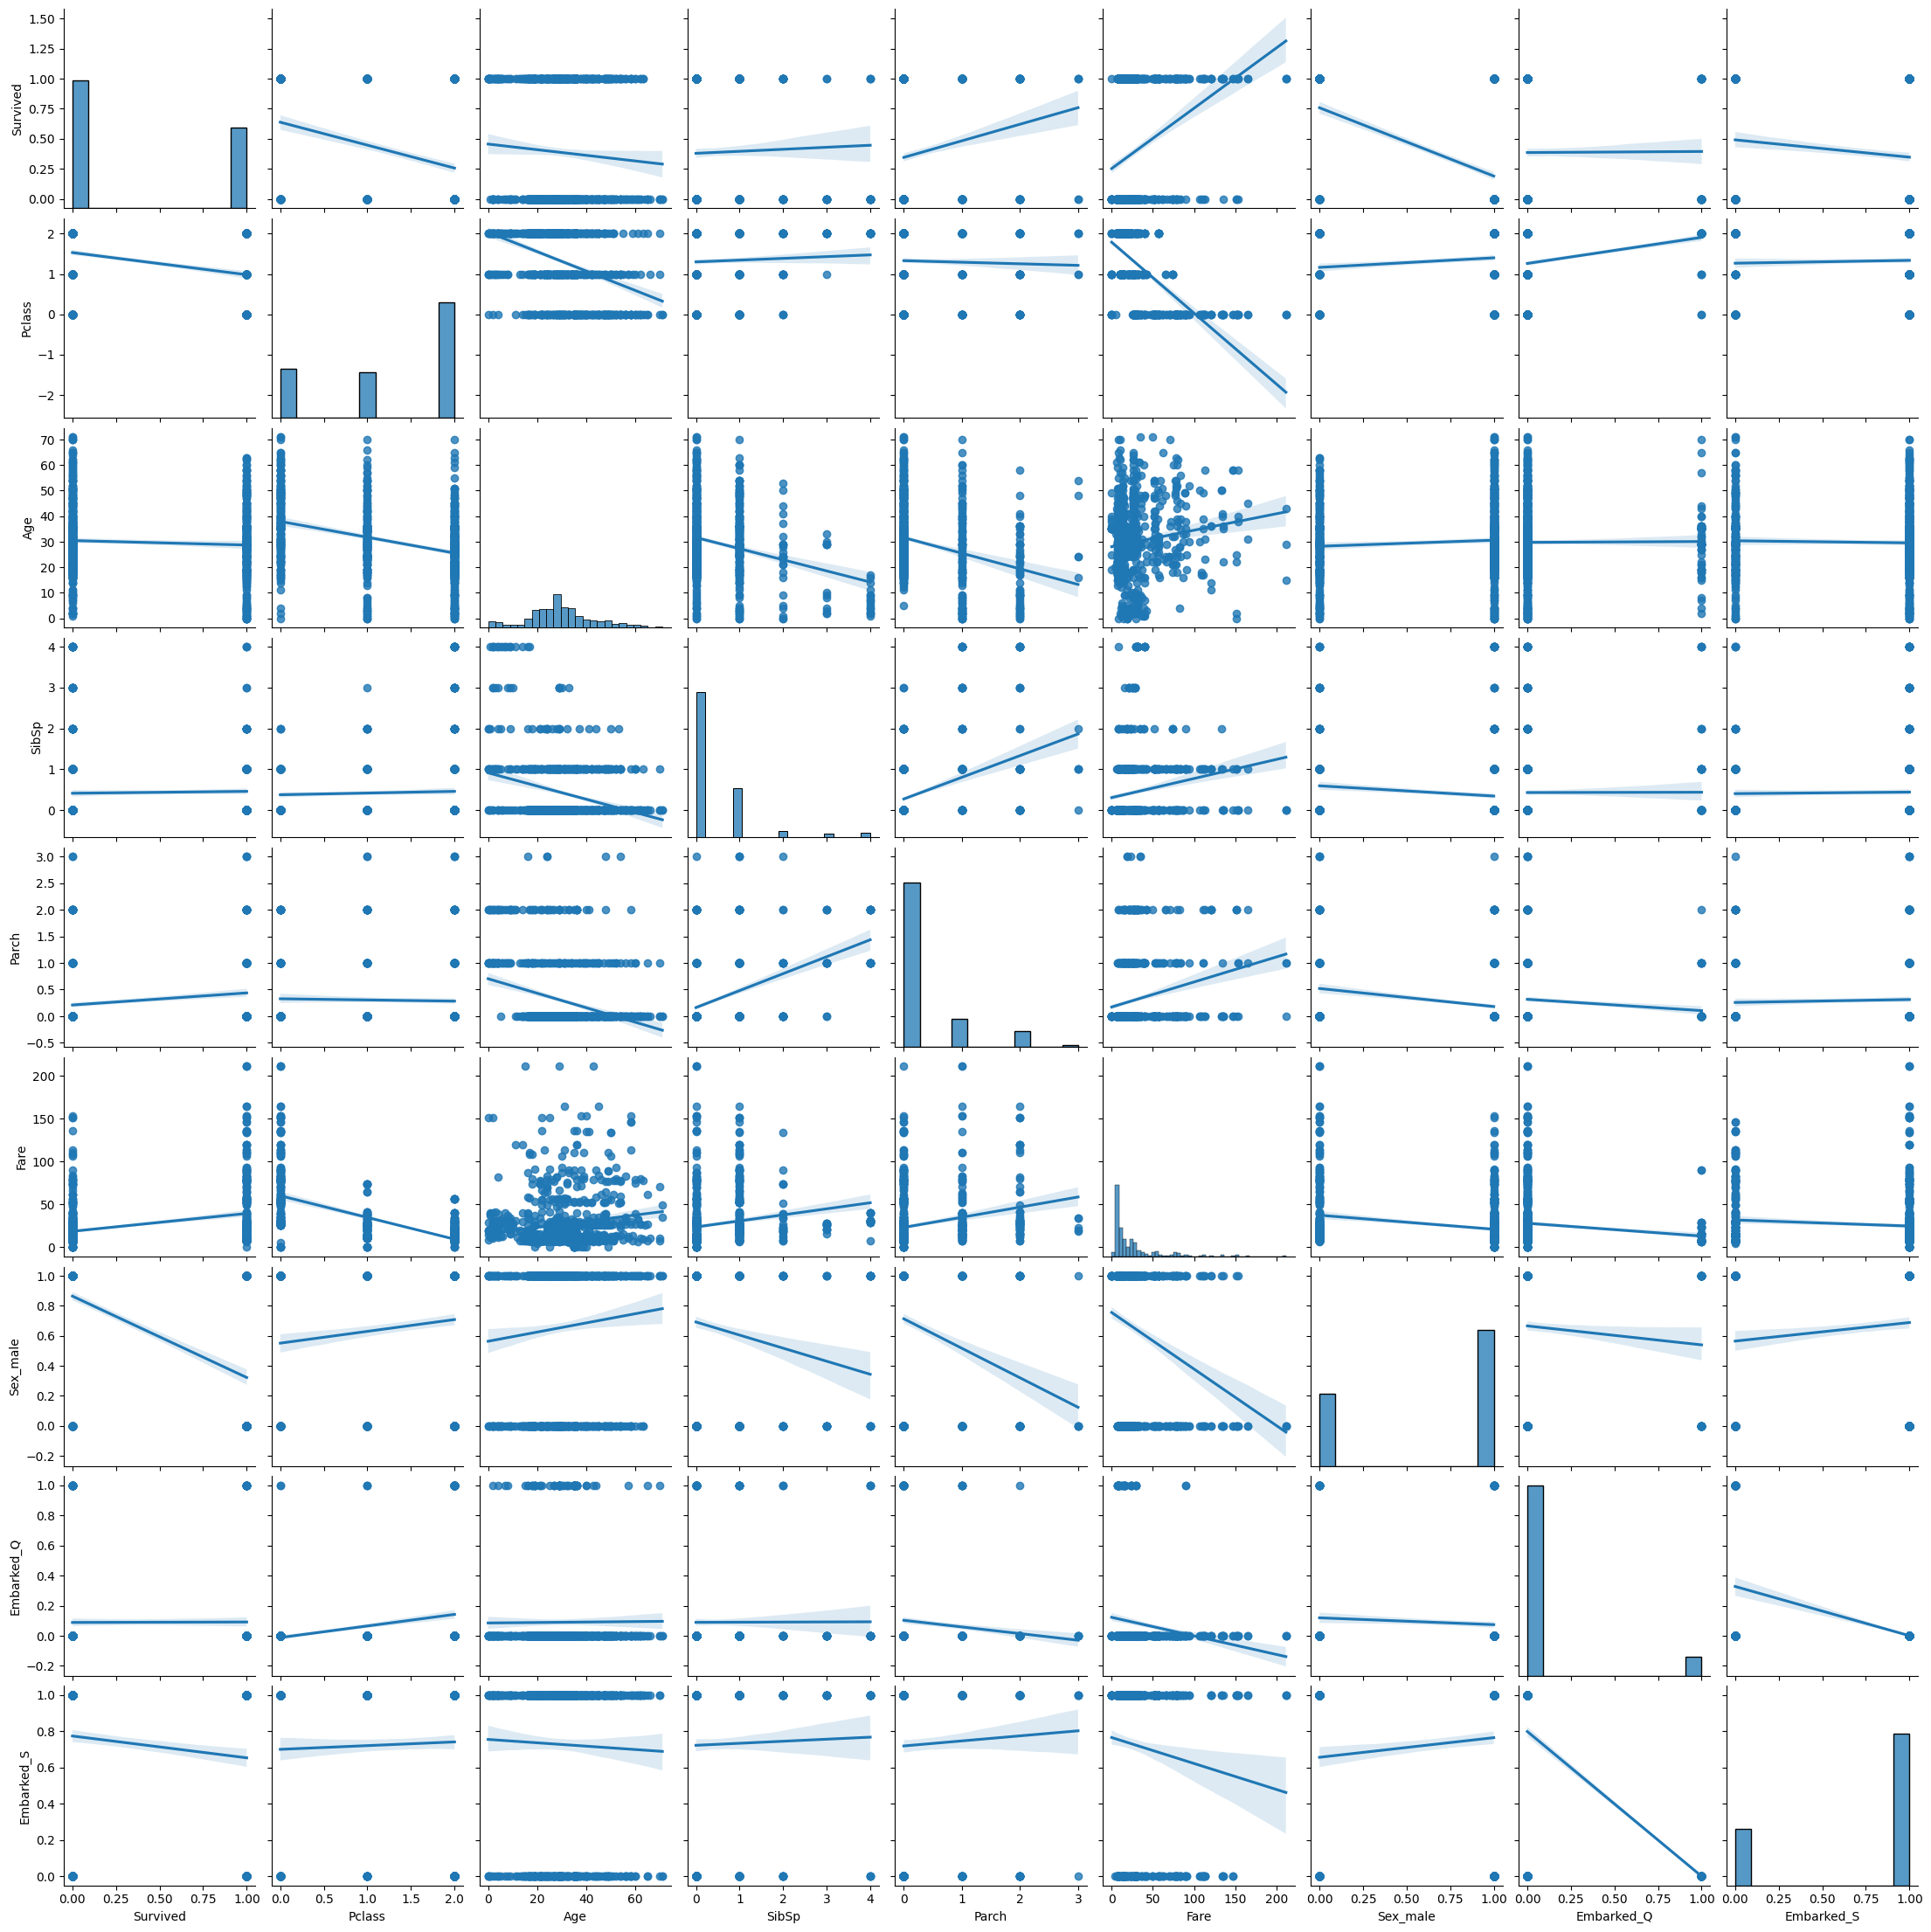

In [65]:
plt.figure(figsize=(10,10))
sb.pairplot(df, kind='reg')
plt.show()

<Axes: >

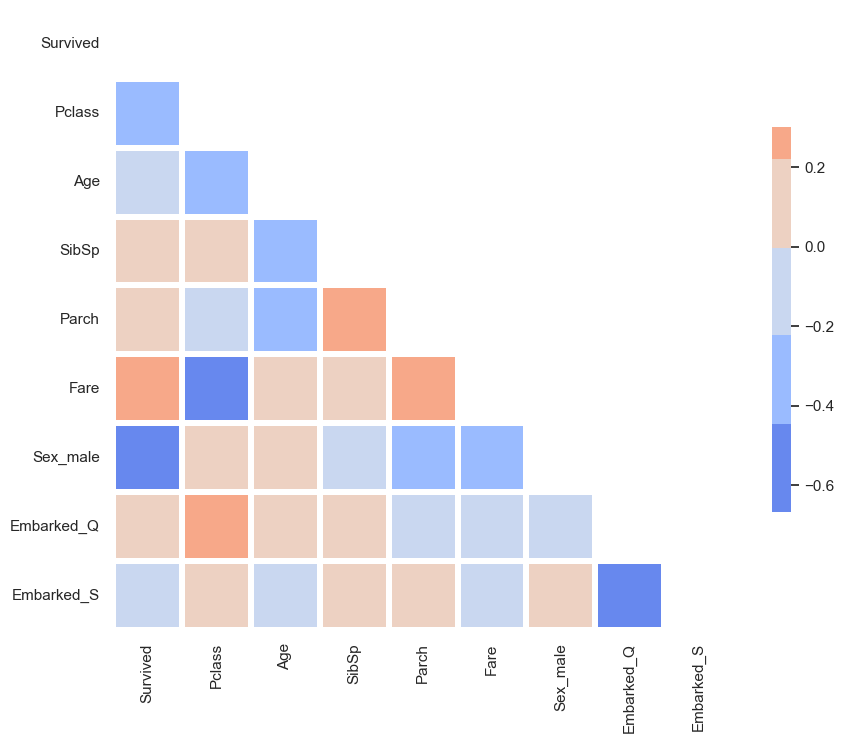

In [66]:
sb.set_theme(style="white")
corr = df.corr()
mask = np.triu(df.corr())
f, ax = plt.subplots(figsize=(10, 10))
cmap = sb.color_palette("coolwarm")

sb.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )

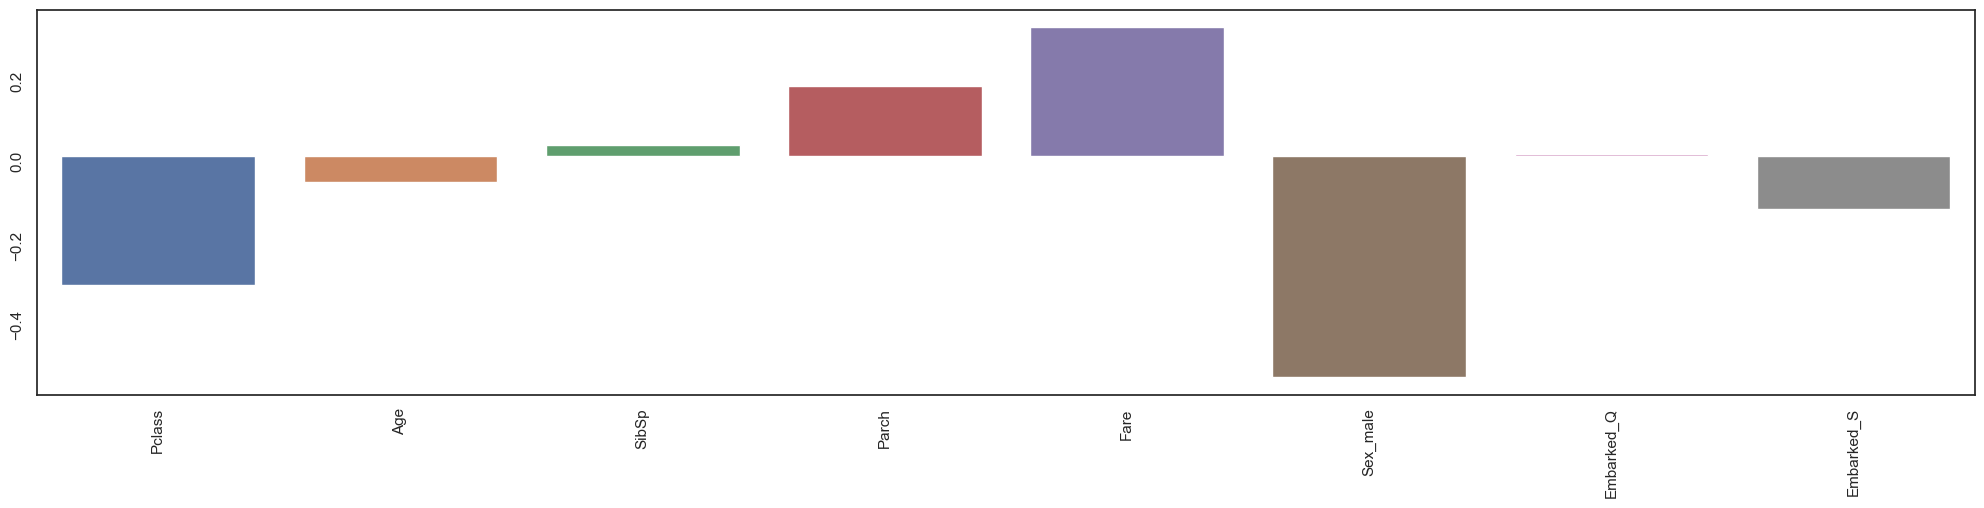

In [67]:
plt.figure(figsize=(25,5))
ax = sb.barplot(x=X_train.corrwith(y_train).index, y=X_train.corrwith(y_train))
ax.tick_params(labelrotation = 90)
plt.show()

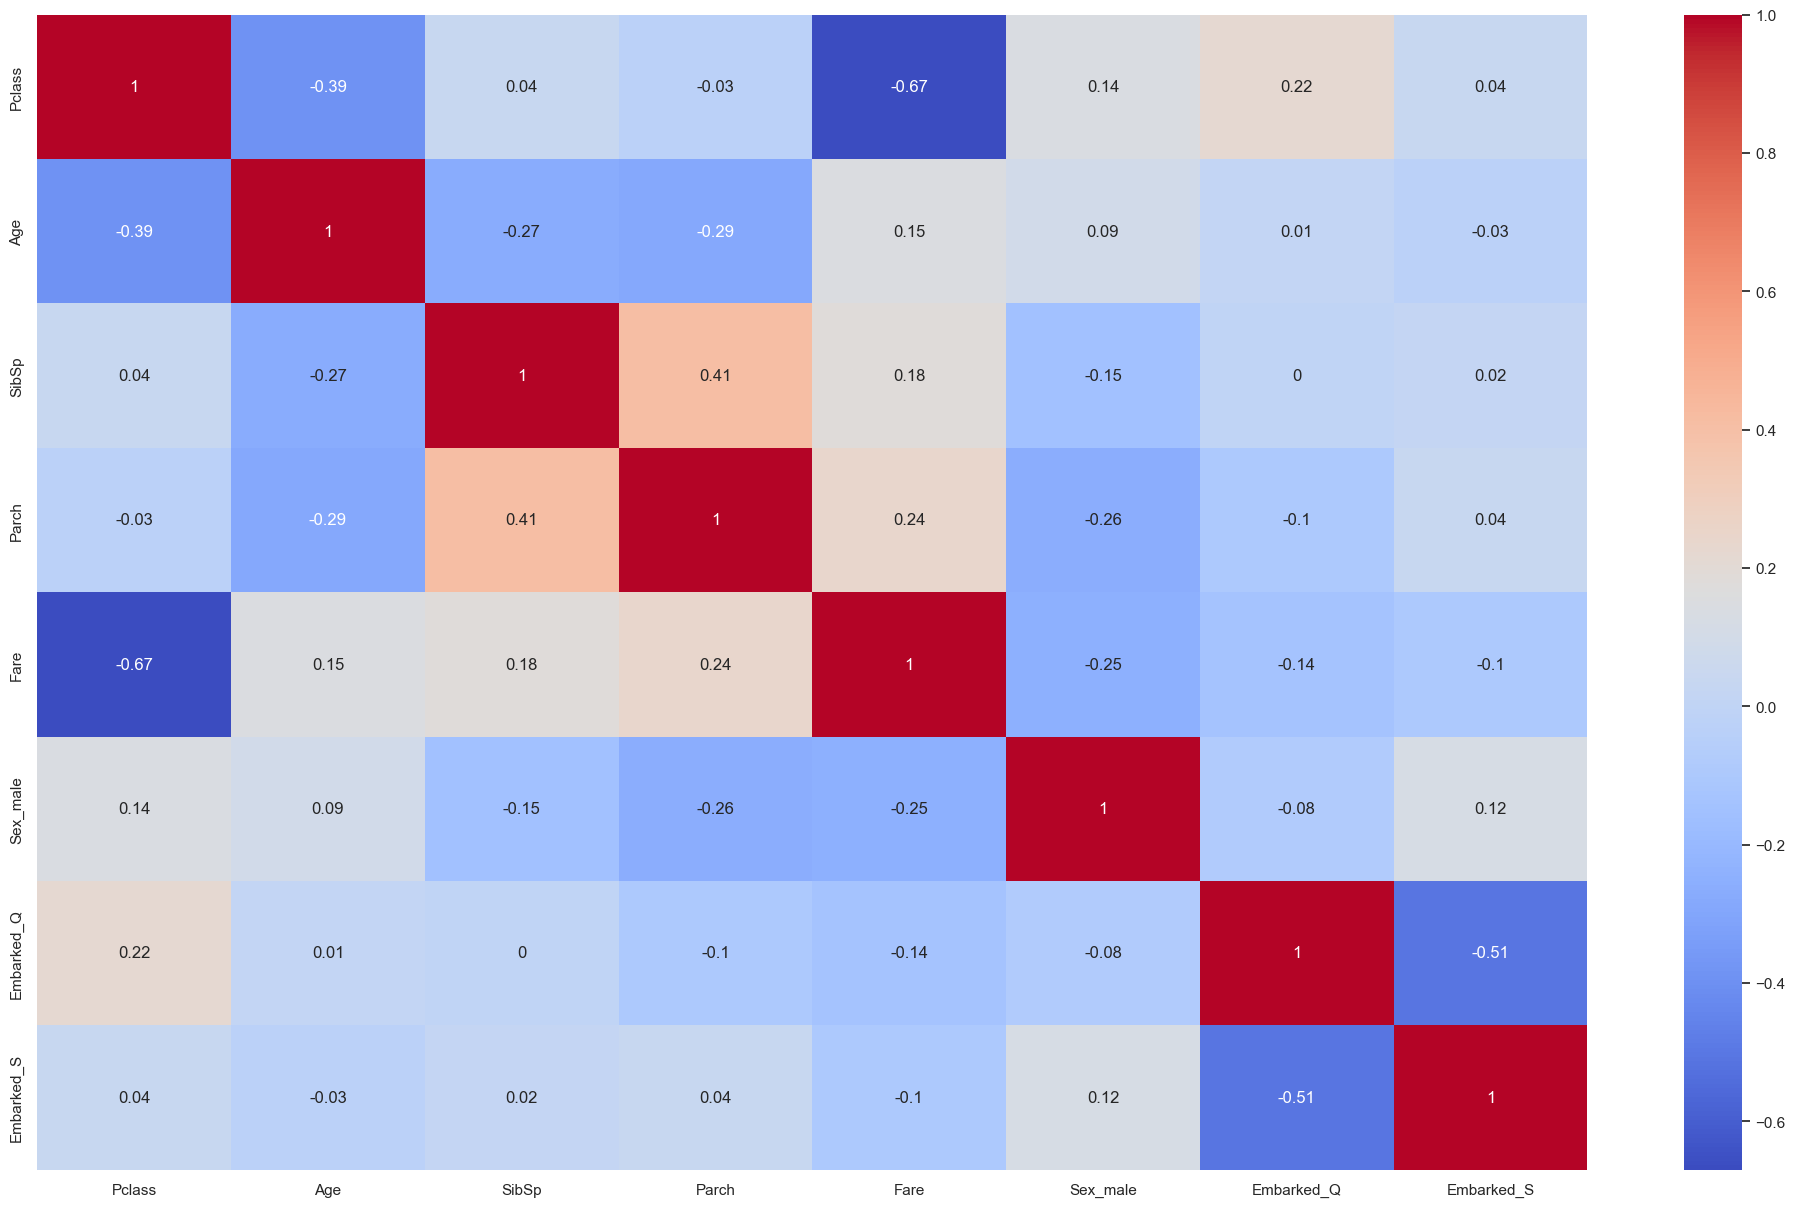

In [68]:
plt.figure(figsize=(25,15))
sb.heatmap(round(X_train.corr(),2),cmap='coolwarm',annot=True)
plt.show()

# PearsonR Correlation Test

In [69]:
from scipy.stats import pearsonr

target = 'Survived'
corelation_with_target = {}

for col in df:
    if target != col:
        corelation_with_target[col] = round(pearsonr(df[col],df[target])[0],2)
        
corelation_with_target

{'Pclass': -0.32,
 'Age': -0.06,
 'SibSp': 0.03,
 'Parch': 0.18,
 'Fare': 0.32,
 'Sex_male': -0.55,
 'Embarked_Q': 0.01,
 'Embarked_S': -0.13}

In [70]:
zero_correlation_col = [var for var in corelation_with_target if (corelation_with_target[var] < 0.09) & (corelation_with_target[var] > -0.50)]

print(len(zero_correlation_col))
zero_correlation_col

5


['Pclass', 'Age', 'SibSp', 'Embarked_Q', 'Embarked_S']

In [71]:
def ninty_correlation(data, threshold):
    corr3 = set()
    corr_matrix = X_train.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                corr3.add(corr_matrix.columns[i])
    return corr3     


In [72]:
overall_corr = ninty_correlation(X_train, 0.85)
overall_corr

set()

# Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Machine Learning Model Development

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

In [75]:
log = LogisticRegression()
rg  = RidgeClassifier()
sgd = SGDClassifier()
svc = SVC()
dt  = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf  = RandomForestClassifier()
bag = BaggingClassifier()
gb  = GradientBoostingClassifier()
gp  = GaussianProcessClassifier()
xg  = XGBClassifier()
xgbr= XGBRFClassifier()

In [76]:
models = {
    
    'a' : ['LogisticRegression',log],
    'b' : ['RidgeClassifier',rg],
    'c' : ['SGDClassifier',sgd],
    'd' : ['SVC',svc],
    'e' : ['DecisionTreeClassifier',dt],
    'f' : ['KNeighborsClassifier',knn],
    'g' : ['RandomForestClassifier',rf],
    'h' : ['BaggingClassifier',bag],
    'i' : ['GradientBoostingClassifier',gb],
    'j' : ['GaussianProcessClassifier',gp],
    'k' : ['XGBClassifier',xg],
    'l' : ['XGBRFClassifier',xgbr]
    
}

# Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, make_scorer

def test_model(each_model, X_train= X_train, y_train= y_train):
    
    cross_valid = KFold(n_splits=5, shuffle=True, random_state=5000)
    r2 = make_scorer(r2_score)
    
    each_r2_val_score = cross_val_score(each_model, X_train, y_train, cv=cross_valid)
    score = [each_r2_val_score.mean()]
    
    return score

In [78]:
model_score = []

for var in models:
    print('Training Model : ', models[var][0])             #[0] = model name
    score = test_model(models[var][1], X_train, y_train)   #[1] = model score
    
    print('Score          : ',score[0])                     #[0] = removing third bracket
    model_score.append([models[var], score])
    print('\n')

Training Model :  LogisticRegression
Score          :  0.7967045063639491


Training Model :  RidgeClassifier
Score          :  0.7979016167870656


Training Model :  SGDClassifier
Score          :  0.7296869625043


Training Model :  SVC
Score          :  0.8072858617131062


Training Model :  DecisionTreeClassifier
Score          :  0.7450223598211214


Training Model :  KNeighborsClassifier
Score          :  0.7990574475404196


Training Model :  RandomForestClassifier
Score          :  0.8037702098383213


Training Model :  BaggingClassifier
Score          :  0.7978740970072239


Training Model :  GradientBoostingClassifier
Score          :  0.7978809769521844


Training Model :  GaussianProcessClassifier
Score          :  0.8014172686618506


Training Model :  XGBClassifier
Score          :  0.8084554523563812


Training Model :  XGBRFClassifier
Score          :  0.8225662194702441




In [82]:
regressor = XGBRFClassifier()  # <-- you need to instantiate the regressor like so 
regressor.fit(X_train, y_train) # <-- you need to call the fit method of the regressor



XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=None,
                reg_alpha=None, ...)

In [83]:
# Predicting the Test set results
Y_pred = regressor.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

# Save The Model

In [84]:
from joblib import Parallel, delayed
import joblib
  
#save model
joblib.dump(regressor, 'titanic_classification.pkl')
  
# Load the model from the file
gradient_boosting_joblib = joblib.load('titanic_classification.pkl')
  
# Use the loaded model to make predictions
gradient_boosting_joblib.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,